# Titanic Data #

## Questions on data ##

   - Was it more likely to survive as male or female passenger?
   - Was ist more likely to survive as first, second or third class passenger?
   - Was ist more likely to survive on the different location of embarkments?
   - Was ist more like to survive as a family member or single person?   

In [368]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
from scipy import stats

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

## Analysis of data in dataset ##

### Structure of dataset ###

|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked
|-|-|-|-|-|-|-|-|-|-|-|
|Passenger Id|Survival (0 = No; 1 = Yes)|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|Name|Sex|Age|Number of Siblings/Spouses Aboard|Number of Parents/Children Aboard|Ticket Number|Passenger Fare|Cabin|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### Example data ####

In [369]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Problems in the dataset ###

In [370]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Not for all passengers the 'Age' is available

Not for all passengers 'Cabin' available (This dows not matter as we a are not interested in this field)

Not for all passengers 'Embarked' is available

### Data Wrangling ###

We removing the columns Name, Ticket and Fare  as we do not need them to answer our questions.
We extract the deck from the cabin and remove the Cabin column. We extract a new field that indicates, if someone is a family member based on the Parch SibSp. We removing those two fields afterwards.

In [371]:
del titanic_df['Name']
del titanic_df['Ticket']
del titanic_df['Fare']

In [372]:
def get_deck(row):
    if row['Cabin'] == row['Cabin']:
        return row['Cabin'][0:1]
    return row['Cabin']
    
# We add a new column to the dataset
titanic_df['Deck'] = titanic_df.apply(get_deck, axis=1)


del titanic_df['Cabin']

In [373]:
# Definition: A passenger is a family member if either SibSp or Parch is > 0
def is_family_member(row):
    return not(row['Parch'] == 0 and row['SibSp'] == 0)

# We add a new column to the dataset
titanic_df['IsFamilyMember'] = titanic_df.apply(is_family_member, axis=1)

# We remove the Parch and SibSp columns
del titanic_df['Parch']
del titanic_df['SibSp']

#### Wrangled Data ####

In [374]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Deck,IsFamilyMember
0,1,0,3,male,22.0,S,NaN,True
1,2,1,1,female,38.0,C,C,True
2,3,1,3,female,26.0,S,NaN,False
3,4,1,1,female,35.0,S,C,True
4,5,0,3,male,35.0,S,NaN,False
5,6,0,3,male,NaN,Q,NaN,False
6,7,0,1,male,54.0,S,E,False
7,8,0,3,male,2.0,S,NaN,True
8,9,1,3,female,27.0,S,NaN,True
9,10,1,2,female,14.0,C,NaN,True


## Questions on data ##

### Overall Survival Probability ###

Survival Probability of all passengers in dataset:

In [375]:
titanic_df.mean()['Survived']

0.38383838383838381

###  Was it more likely to survive as male or female passenger? ###

In [376]:
survival_df_female = titanic_df[titanic_df['Sex'] == 'female']['Survived']
survival_df_male = titanic_df[titanic_df['Sex'] == 'male']['Survived']

Survival rate by sex:

In [377]:
titanic_df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

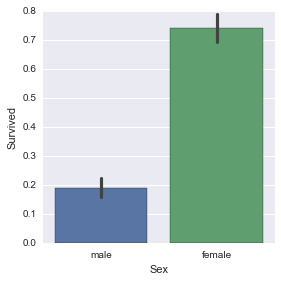

In [378]:
%matplotlib inline
sns.factorplot(x = 'Sex', y = 'Survived', data = titanic_df, kind = 'bar')

 #### Statistical Test ####
    
   ##### Null Hypothesis: ##### 
   
   $H_0 : \mu_{female} - \mu_{male} = 0$       
   
   The survival probability of the female and male passengers is the same
    
   ##### Alternate Hypothesis: #####
   
   $H_A : \mu_{female} - \mu_{male} > 0$       
   
   The survival probality of female passengers is higher than the survival probabilty of male passengers.
   
   
   
   
   
   We will perform a ** two tailed unpaired t-test **. We perform a t-test as we have a normal distribution and we do not know the population standard deviation. It's unpaired as the groups of female and male passengers are independent of each other. We choose an alpha level $\alpha = .01.$ 


###### Mean 

In [379]:
titanic_df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

$\bar{x}_{female} = 0.742038$

$\bar{x}_{male} = 0.188908$

###### Mean difference

In [380]:
survival_df_female.mean() - survival_df_male.mean()

0.5531300709799203

$\bar{x}_{x_{female}- x_{male}} = 0.5531300709799203$

###### Standard deviation

In [381]:
titanic_df.groupby('Sex').std()['Survived']

Sex
female    0.438211
male      0.391775
Name: Survived, dtype: float64

$S_{female} = 0.438211$

$S_{male} = 0.391775$

###### Standard error of the mean

In [382]:
stats.sem(survival_df_female)

0.024729688908190332

$SEM_{female} = 0.024729688908190332$

In [383]:
stats.sem(survival_df_male)

0.016309818218993685

$SEM_{male} = 0.016309818218993685$

###### Standard error of the difference

In [384]:
pow(pow(survival_df_female.std(), 2) / survival_df_female.count() + pow(survival_df_male.std(), 2) / survival_df_male.count(), 0.5)

0.029623768899862974

$SE = 0.029623768899862974$

###### Degrees of freedom

In [385]:
df = survival_df_female.count() + survival_df_male.count() - 2
df

889

$df = n_{female} + n_{male} - 2 = 889$

###### t and p value

In [386]:
t, p = stats.ttest_ind(survival_df_female,survival_df_male)

In [387]:
t

19.297816550123351

$t = 19.297816550123351$

In [388]:
p

1.4060661308802594e-69


$p = 1.4060661308802594e-69$

###### Confidence interval

In [389]:
cm = sms.CompareMeans(sms.DescrStatsW(survival_df_female), sms.DescrStatsW(survival_df_male))
cm.tconfint_diff(alpha=.01, alternative='two-sided')

(0.47914067021664691, 0.62711947174319371)

###### Effect size

In [390]:
pow(t,2)/(pow(t,2) + df)

0.2952307228626887

$r^2 = \frac{t^2}{t^2 + df} = .30$

#### Result ####

$t(889) = 19.30, p < .0001, two-tailed$
    
$99\% CI = (0.48, 0.63)$

$r^2 = .30$

I ** reject ** $H_0$, because the t value is in the critical region with p < .0001. As p is below .0001 the difference is considered to be ** extremely statistically significant **. The effect size is 30%.

This means that survival rate of the female passengers (74,2%) in the dataset is higher than the overall survival rate (38.4%) and higher than the survival rate of the male passengers (18.9%). This is due the fact that female passengers (and children) are rescued first. (["Women and children first" code of conduct](https://en.wikipedia.org/wiki/Women_and_children_first))

### Was ist more likely to survive as first, second or third class passenger? ###

Survival rate by passenger class

In [391]:
titanic_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

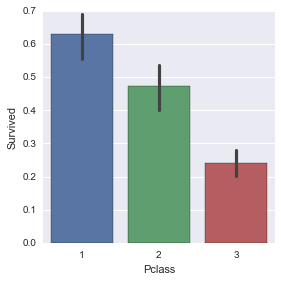

In [392]:
%matplotlib inline
sns.factorplot(x = 'Pclass', y ='Survived', data = titanic_df, kind = 'bar')

#### Where are the cabins of each passenger class located?

##### Titanic deck layout

![Titanic deck layout](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/400px-Titanic_cutaway_diagram.png "Titanic deck layout")

In [393]:
# We drop all NaN entries in the Deck subset, we also drop the entry with the deck 'T' as 
# there was no deck 'T'
deck_titanic_df = titanic_df[titanic_df.Deck != 'T'].dropna(subset=['Deck'])

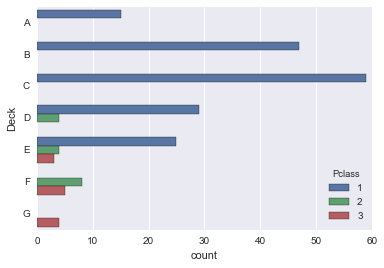

In [394]:
%matplotlib inline
sns.countplot(y="Deck", hue="Pclass", data=deck_titanic_df.sort_values(by='Deck'));

In [395]:
deck_titanic_df.groupby(['Pclass']).Survived.count()

Pclass
1    175
2     16
3     12
Name: Survived, dtype: int64

In [403]:
deck_titanic_df[deck_titanic_df['Pclass'] == 1].groupby(['Pclass','Deck']).Survived.mean()

Pclass  Deck
1       A       0.466667
        B       0.744681
        C       0.593220
        D       0.758621
        E       0.720000
Name: Survived, dtype: float64

#### Conclusion ####

The Survival probability of first class passengers was the highest (63.0%). On the other hand the third class had a very low probability of surviving the desaster (24.2%). This is due the fact, that first class passengers where rescued because of their social status.

Another idea is that the passengers with cabins on the top of ship were rescued first. Therefore we checked the 


### Was ist more likely to survive on the different location of embarkments? ###

Survival rate by embarkement location:

In [397]:
titanic_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

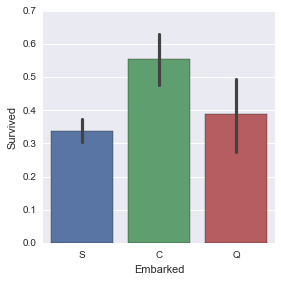

In [398]:
%matplotlib inline
sns.factorplot(x = 'Embarked', y = 'Survived', data = titanic_df, kind = 'bar')

Passengers by embarkment location and class:

In [399]:
titanic_df.groupby(['Embarked','Pclass',]).size() / titanic_df.groupby('Embarked').size()

Embarked  Pclass
C         1         0.505952
          2         0.101190
          3         0.392857
Q         1         0.025974
          2         0.038961
          3         0.935065
S         1         0.197205
          2         0.254658
          3         0.548137
dtype: float64

#### Conclusion ####

The probabilty of surviving the titanic disaster was highest if someone boarded in Cherbourg.
This is because a lot of passengers who embarked in Cherbourg had first class ticket.

### Was ist more like to survive as a family member or single person? ###

In [400]:
titanic_df.groupby('IsFamilyMember')['Survived'].mean()

IsFamilyMember
False    0.303538
True     0.505650
Name: Survived, dtype: float64

In [401]:
titanic_df.groupby(['Pclass','IsFamilyMember'])['Survived'].mean()

Pclass  IsFamilyMember
1       False             0.532110
        True              0.728972
2       False             0.346154
        True              0.637500
3       False             0.212963
        True              0.299401
Name: Survived, dtype: float64

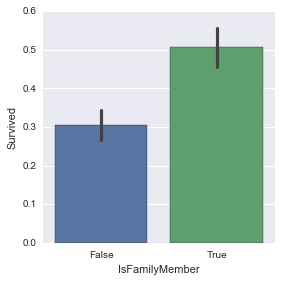

In [402]:
%matplotlib inline
sns.factorplot(x = 'IsFamilyMember', y ='Survived', data = titanic_df, kind = 'bar')

### Survival by Age